In [3]:
!pip install -r requirements.txt

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 487.6 kB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.9 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Dell\AppData\Local\Temp\ipykernel_14384\1971251549.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades_clean.rename(columns={'Closed PnL':'pnl'}, inplace=True)


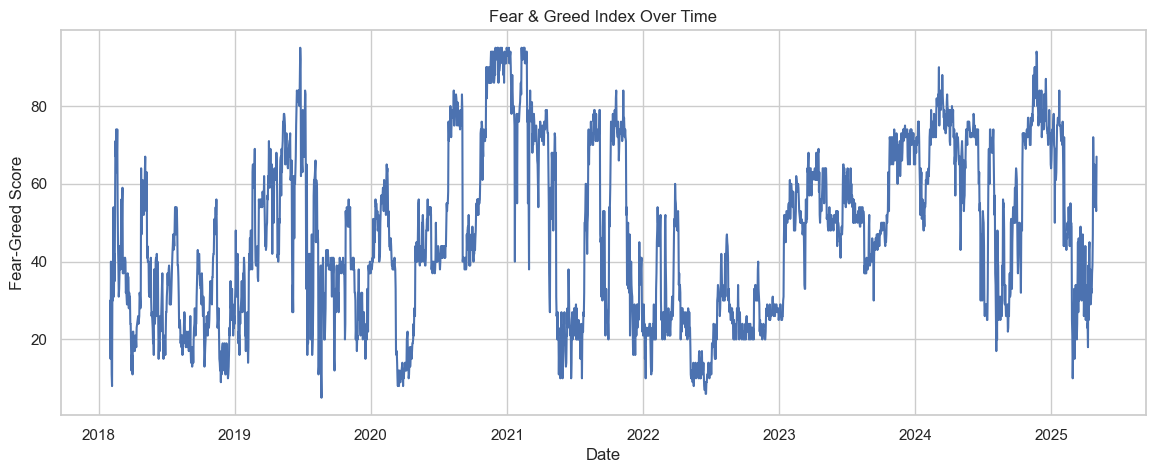

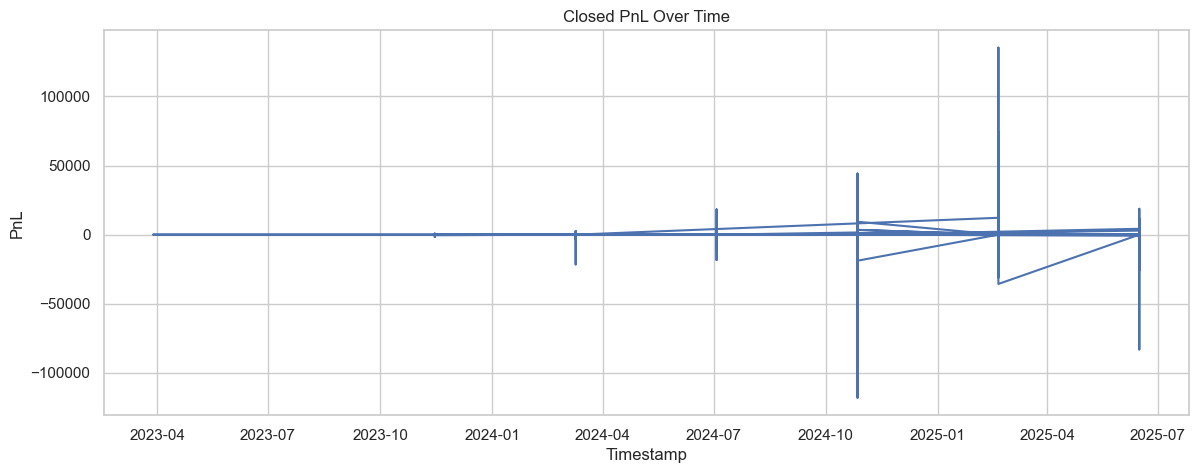

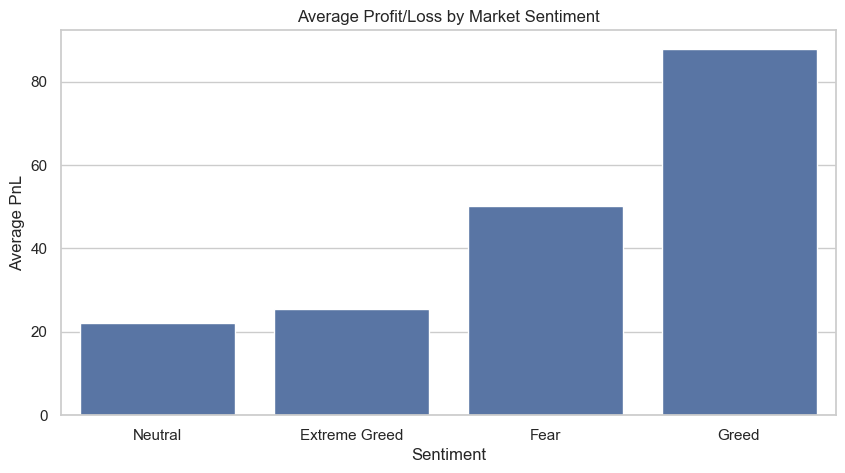

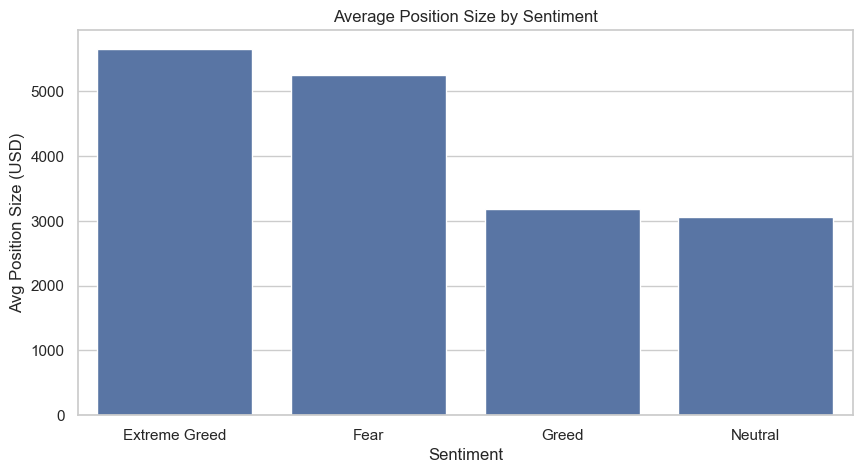

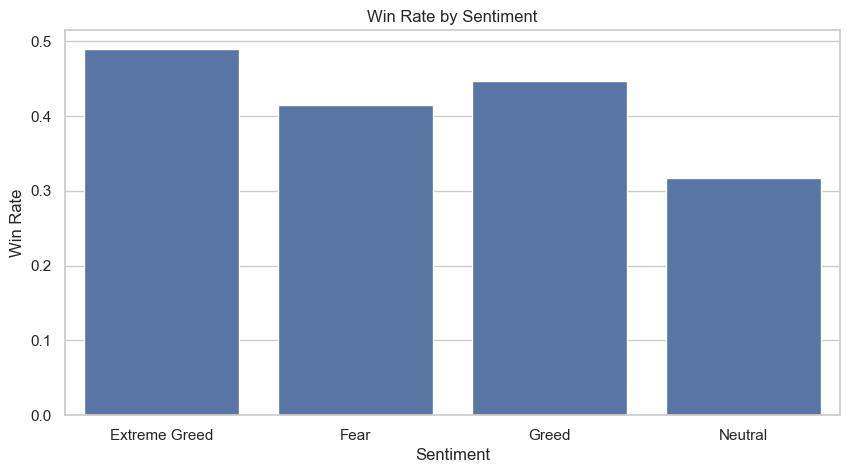

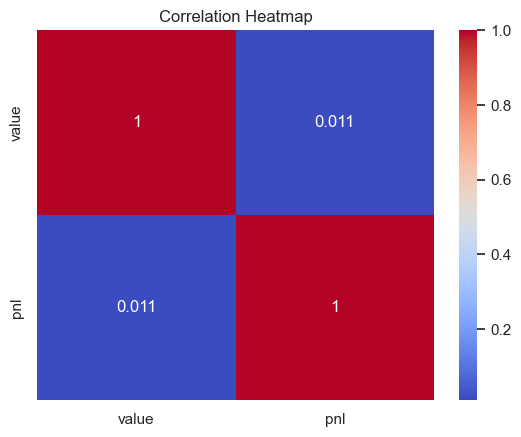


================ INSIGHTS ================

Best Performance Sentiment: Greed
Worst Performance Sentiment: Neutral
Largest Position Size During: Extreme Greed
Highest Win Rate During: Extreme Greed
Correlation between sentiment score and PnL: 0.011131821560949329



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")

# --- CLEANING ---
trades['Timestamp'] = pd.to_datetime(trades['Timestamp'], unit='ms')
trades['date'] = trades['Timestamp'].dt.date
trades_clean = trades[['Timestamp','date','Execution Price','Size USD','Side','Closed PnL']]
trades_clean.rename(columns={'Closed PnL':'pnl'}, inplace=True)

sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date
sentiment_clean = sentiment[['date','value','classification']]

# --- MERGE ---
merged = pd.merge(trades_clean, sentiment_clean, on='date', how='left')

# --- EDA ---
plt.figure(figsize=(14,5))
plt.plot(sentiment_clean['date'], sentiment_clean['value'])
plt.title("Fear & Greed Index Over Time")
plt.xlabel("Date")
plt.ylabel("Fear-Greed Score")
plt.show()

plt.figure(figsize=(14,5))
plt.plot(merged['Timestamp'], merged['pnl'])
plt.title("Closed PnL Over Time")
plt.xlabel("Timestamp")
plt.ylabel("PnL")
plt.show()

avg_pnl = merged.groupby('classification')['pnl'].mean().sort_values()
plt.figure(figsize=(10,5))
sns.barplot(x=avg_pnl.index, y=avg_pnl.values)
plt.title("Average Profit/Loss by Market Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average PnL")
plt.show()

avg_size = merged.groupby('classification')['Size USD'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=avg_size.index, y=avg_size.values)
plt.title("Average Position Size by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Avg Position Size (USD)")
plt.show()

merged['win'] = (merged['pnl'] > 0).astype(int)
win_rate = merged.groupby('classification')['win'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=win_rate.index, y=win_rate.values)
plt.title("Win Rate by Sentiment")
plt.ylabel("Win Rate")
plt.xlabel("Sentiment")
plt.show()

corr = merged[['value','pnl']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# --- INSIGHTS ---
print("\n================ INSIGHTS ================\n")
print("Best Performance Sentiment:", avg_pnl.idxmax())
print("Worst Performance Sentiment:", avg_pnl.idxmin())
print("Largest Position Size During:", avg_size.idxmax())
print("Highest Win Rate During:", win_rate.idxmax())

corr_value = corr.iloc[0,1]
print("Correlation between sentiment score and PnL:", corr_value)
print("\n==========================================")
